In [1]:
#Importing Libraries Used
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)



In [2]:
#Creating Dataframe
data = pd.read_csv('VGSales.csv', encoding='latin1')
VGS = pd.DataFrame(data)



In [3]:
VGS.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,PS4,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Call of Duty: WWII,PS4,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
3,FIFA 18,PS4,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
4,FIFA 17,PS4,2016,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
5,Uncharted PS4,PS4,2016,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
6,Grand Theft Auto V,XOne,2014,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
7,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,3.11,3.83,0.19,1.36,8.48
8,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48
9,FIFA 16,PS4,2015,Sports,EA Sports,1.15,5.77,0.07,1.23,8.22


In [4]:
VGS.drop_duplicates() #Removing Duplicates
VGS_miss_values = VGS.isnull().sum() #Checking Attributes that have Null Values 
VGS.Publisher = VGS.Publisher.mask(VGS.Publisher == 'Sony Computer Entertainment','Sony Interactive Entertainment') #Replacing variations with consistent value
VGS.Publisher = VGS.Publisher.mask(VGS.Publisher == 'Warner Bros. Interactive','Warner Bros. Interactive Entertainment')
VGS.Publisher = VGS.Publisher.mask(VGS.Publisher == '2K Games','Take-Two Interactive')
VGS.Publisher = VGS.Publisher.mask(VGS.Publisher == '2K Sports','Take-Two Interactive')
VGS.Publisher = VGS.Publisher.mask(VGS.Publisher == 'Rockstar Games','Take-Two Interactive')
VGS.Publisher = VGS.Publisher.mask(VGS.Publisher == 'EA Sports','Electronic Arts')


In [5]:
VGS.groupby('Publisher')['Global_Sales'].sum() #Finding Total Sales made by each publisher

Publisher
11 bit studios                             0.01
505 Games                                  6.63
5pb                                        0.14
Accolade                                   0.05
Acquire                                    0.14
                                          ...  
Warner Bros. Interactive Entertainment    50.62
Wired Productions                          0.06
Xseed Games                                0.08
Yacht Club Games                           0.14
Yeti                                       0.03
Name: Global_Sales, Length: 114, dtype: float64

In [6]:
VGS.Genre.unique() #Displaying Each Unique Genre

array(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Action-Adventure',
       'Misc', 'Platform', 'Racing', 'Fighting', 'Adventure', 'MMO',
       'Simulation', 'Music', 'Party', 'Strategy', 'Puzzle',
       'Visual Novel'], dtype=object)

In [7]:
VGS.groupby('Genre')['Global_Sales'].sum() #Finding Total Sales made by Each Genre

Genre
Action              167.02
Action-Adventure     48.42
Adventure            18.38
Fighting             23.22
MMO                   5.04
Misc                 21.36
Music                 9.44
Party                 0.65
Platform             20.38
Puzzle                0.75
Racing               41.92
Role-Playing         75.92
Shooter             226.93
Simulation            6.95
Sports              132.81
Strategy              2.19
Visual Novel          0.48
Name: Global_Sales, dtype: float64

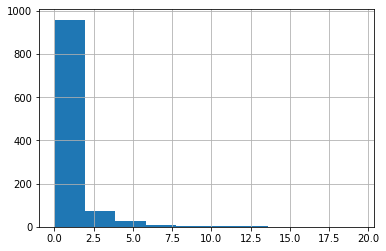

In [8]:
VGS.Global_Sales.hist()

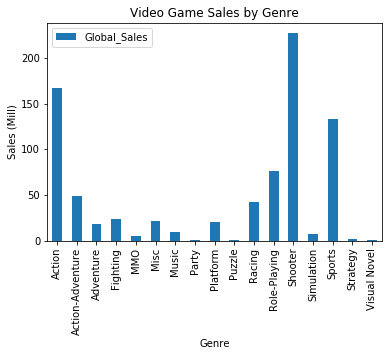

In [9]:
#Displaying Total Video Game Sales by Genre
VGS.groupby('Genre')['Global_Sales'].sum().plot(kind = 'bar')
plt.ylabel('Sales (Mill)')
plt.xlabel('Genre')
plt.legend()
plt.title('Video Game Sales by Genre')
plt.savefig('/Users/Saacid/Desktop/Genre_Sales.png', bbox_inches= 'tight')

In [10]:
#Displaying Total Video Game Sales by Genre in different regions
VGS.groupby('Genre')['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

C:\Users\Saacid\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,167.02,70.02,66.62,7.59,22.65
Action-Adventure,48.42,18.85,21.36,1.39,6.88
Adventure,18.38,7.32,7.11,1.55,2.40
Fighting,23.22,11.80,6.75,1.40,3.23
MMO,5.04,2.27,1.87,0.20,0.69
Misc,21.36,8.88,8.88,0.97,2.65
Music,9.44,5.58,2.40,0.17,1.27
Party,0.65,0.09,0.47,0.00,0.10
Platform,20.38,6.98,9.72,0.67,3.01


C:\Users\Saacid\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



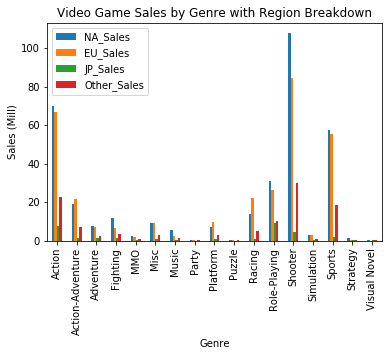

In [11]:
#Displaying Total Video Game Sales by Genre in different regions as a barchart
VGS.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum().plot(kind = 'bar')
plt.ylabel('Sales (Mill)')
plt.xlabel('Genre')
plt.legend()
plt.title('Video Game Sales by Genre with Region Breakdown')
plt.savefig('/Users/Saacid/Desktop/Genre_SalesRB.png', bbox_inches= 'tight', dpi =1366)

In [12]:
#Showing Top 15 Selling Video Games
tp=VGS.head(15)
TP1=go.Scatter(
                    x = tp.Name,
                    y = tp.Global_Sales,
                    mode = "markers",
                    name = "Global_Sales",
                    text= tp.Name)

datas = [TP1]

layout = dict(title = 'Top 15 Video Games',
              xaxis= dict(title= 'Title',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Global_Sales(In Millions)',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
               )
fig = dict(data = datas, layout = layout)
iplot(fig)

In [13]:
#Video Game Sales Breakdown by Platform
labels = VGS.Platform
values = VGS.Global_Sales

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

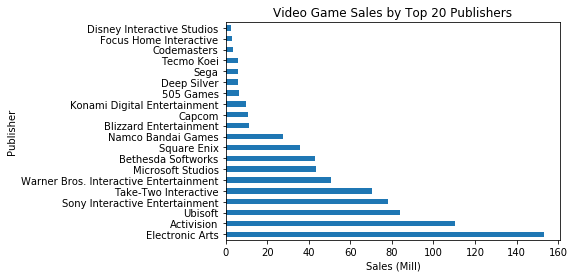

In [14]:
#Video Game Sales by Top 20 Publishers
Pub = VGS.groupby('Publisher')['Global_Sales'].sum()
Pubs = Pub.sort_values(ascending = False)
Pubss= Pubs[0:20]
Pubss.plot(kind = 'barh')
plt.ylabel('Publisher')
plt.xlabel('Sales (Mill)')
plt.title('Video Game Sales by Top 20 Publishers')
plt.savefig('/Users/Saacid/Desktop/Pub_Sales1RB.png', bbox_inches= 'tight', dpi =1366)


In [15]:
#Video Game Sales by Top 5 Publishers
Pubsss= Pubs[0:5]
Pubsss

Publisher
Electronic Arts                   153.44
Activision                        110.46
Ubisoft                            83.85
Sony Interactive Entertainment     77.97
Take-Two Interactive               70.67
Name: Global_Sales, dtype: float64

In [16]:
#Genre Breakdown of Video Game Sales by Top 5 Publishers
xEA=VGS[VGS.Publisher =='Electronic Arts']
a=xEA.groupby('Genre')["Global_Sales"].sum() #Shows the Breakdown of EA's video game sales by Genre
xActi=VGS[VGS.Publisher=='Activision']
b=xActi.groupby('Genre')["Global_Sales"].sum()
xUbi=VGS[VGS.Publisher=='Ubisoft']
c=xUbi.groupby('Genre')["Global_Sales"].sum()
x2k=VGS[VGS.Publisher=='Take-Two Interactive']
d=x2k.groupby('Genre')["Global_Sales"].sum()
a #Prints the Breakdown of EA's video game sales by Genre


Genre
Fighting         1.59
Platform         0.61
Racing           9.24
Role-Playing     5.60
Shooter         49.50
Simulation       2.12
Sports          84.78
Name: Global_Sales, dtype: float64

In [17]:
#Video Games Released by Top 5 Publishers with Genre Breakdown
xEA=VGS[VGS.Publisher =='Electronic Arts']
xActi=VGS[VGS.Publisher=='Activision']
xUbi=VGS[VGS.Publisher=='Ubisoft']
xSony=VGS[VGS.Publisher=='Sony Interactive Entertainment']
x2k=VGS[VGS.Publisher=='Take-Two Interactive']
TP1 = go.Histogram(
    x=xEA.Genre,
    name = "Electronic Arts",
    marker=dict(color='rgb(215,48,39)'))
TP2 = go.Histogram(
    x=xActi.Genre,
    opacity=0.75,
    name = "Activision",
    marker=dict(color='rgb(165,0,38)'))
TP3 = go.Histogram(
    x=xUbi.Genre,
    opacity=0.75,
    name = "Ubisoft",
    marker=dict(color='rgb(244,109,67)'))
TP4 = go.Histogram(
    x=xSony.Genre,
    opacity=0.75,
    name = "Sony Interactive Entertainment",
    marker=dict(color='rgb(69,117,180)'))
TP5 = go.Histogram(
    x=x2k.Genre,
    opacity=0.75,
    name = "Take-Two Interactive",
    marker=dict(color='rgb(116,173,209)'))


data=[TP1, TP2, TP3, TP4, TP5]

layout = go.Layout(
    title='Games Released by Publishers with Genre Breakdown',
    xaxis=dict(
        title='Publisher'
    ),
    yaxis=dict(
        title='Games Released'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data, layout=layout)
iplot(fig)

In [18]:
#Genre Breakdown of Video Games released by Platform
xPS41=VGS[VGS.Platform=='PS4']
xXOne1=VGS[VGS.Platform=='XOne']
TP11 = go.Histogram(
    x=xPS41.Genre,
    opacity=0.75,
    name = "PS4",
    marker=dict(color='rgb(30,144,255)'))
TP22 = go.Histogram(
    x=xXOne1.Genre,
    opacity=0.75,
    name = "XOne",
    marker=dict(color='rgb(0,128,0)'))


data=[TP11, TP22]

layout = go.Layout(
    title='Genre Breakdown by Platform',
    xaxis=dict(
        title='Genre'
    ),
    yaxis=dict(
        title='Games Released'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data, layout=layout)
iplot(fig)

Text(0.5, 1.0, 'Video Games Released Each Year')

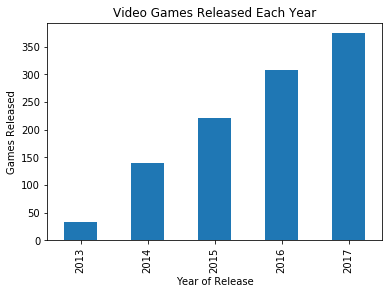

In [19]:
#Video Games Released Yearly as a Barchart
YR = VGS.groupby('Year_of_Release')['Name'].count().plot(kind='bar')
plt.ylabel('Games Released')
plt.xlabel('Year of Release')
plt.title('Video Games Released Each Year')


In [20]:
#Video Games Released Yearly as a Line Graph

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[2013, 2014, 2015, 2016, 2017],
    y= VGS.groupby('Year_of_Release')['Name'].count(),
    marker=dict(color="crimson", size=12)
))

fig.update_layout(title="Video Games Released Each Year",
                  xaxis_title='Year of Release',
                  yaxis_title='Games Released')

fig.show()

Text(0.5, 1.0, 'Video Game Sales Each Year')

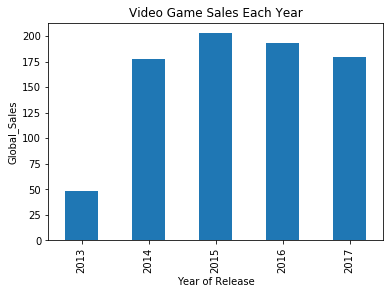

In [21]:
#Video Games Sales Yearly as a Barchart
YR = VGS.groupby('Year_of_Release')['Global_Sales'].sum().plot(kind='bar')
plt.ylabel('Global_Sales')
plt.xlabel('Year of Release')
plt.title('Video Game Sales Each Year')


In [22]:
#Video Games Sales Yearly as a Scatter Plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[2013, 2014, 2015, 2016, 2017],
    y= VGS.groupby('Year_of_Release')['Global_Sales'].sum(),
    marker=dict(color="green", size=12),
    mode="markers",

))

fig.update_layout(title="Global Video Game Sales Each Year",
                  xaxis_title="Year of Release",
                  yaxis_title="Global Sales (Millions)")

fig.show()

In [24]:
#Finding the Yearly Breakdown of Sales by Each Genre
xsports=VGS[VGS.Genre=="Sports"] #Initialising the Varibale
xaction=VGS[VGS.Genre=="Action"]
xrole=VGS[VGS.Genre=="Role-Playing"]
xshooter=VGS[VGS.Genre=="Shooter"]
xadventure=VGS[VGS.Genre=="Adventure"]
xrace=VGS[VGS.Genre=="Racing"]
xplatform=VGS[VGS.Genre=="Platform"]
xsimulation=VGS[VGS.Genre=="Simulation"]
xfight=VGS[VGS.Genre=="Fighting"]
xstrategy=VGS[VGS.Genre=="Strategy"]
xpuzzle=VGS[VGS.Genre=="Puzzle"]
xactionadventure=VGS[VGS.Genre=="Action-Adventure"]
xmmo=VGS[VGS.Genre=="MMO"]
xmisc=VGS[VGS.Genre=="Misc"]
xmusic=VGS[VGS.Genre=="Music"]
xvis=VGS[VGS.Genre=="Visual Novel"]
xparty=VGS[VGS.Genre=="Party"]


T1 =xsports.groupby("Year_of_Release")["Global_Sales"].sum() #Finding the Sum of Global Sales for Each Year for the Sports Genre
T2=xaction.groupby("Year_of_Release")["Global_Sales"].sum()
T3=xrole.groupby("Year_of_Release")["Global_Sales"].sum()
T4=xshooter.groupby("Year_of_Release")["Global_Sales"].sum()
T5=xadventure.groupby("Year_of_Release")["Global_Sales"].sum()
T6=xrace.groupby("Year_of_Release")["Global_Sales"].sum()
T7=xplatform.groupby("Year_of_Release")["Global_Sales"].sum()
T8=xsimulation.groupby("Year_of_Release")["Global_Sales"].sum()
T9=xfight.groupby("Year_of_Release")["Global_Sales"].sum()
T10=xstrategy.groupby("Year_of_Release")["Global_Sales"].sum()
T11=xpuzzle.groupby("Year_of_Release")["Global_Sales"].sum()
T12=xactionadventure.groupby("Year_of_Release")["Global_Sales"].sum()
T13=xmmo.groupby("Year_of_Release")["Global_Sales"].sum()
T14=xmisc.groupby("Year_of_Release")["Global_Sales"].sum()
T15=xmusic.groupby("Year_of_Release")["Global_Sales"].sum()
T16=xvis.groupby("Year_of_Release")["Global_Sales"].sum()
T17=xparty.groupby("Year_of_Release")["Global_Sales"].sum()

T1

Year_of_Release
2013     9.52
2014    22.48
2015    30.96
2016    38.51
2017    31.34
Name: Global_Sales, dtype: float64